standard scaller, 
Min - Max scaller, 
Max - Abs Scaller

In [25]:
# import libraries
import pandas as pd
from sklearn.preprocessing import StandardScaler, MinMaxScaler, MaxAbsScaler

In [26]:
# make a sample dataframe

data = {
    'age':[25, 30, 35, 40, 45],
    'height':[165, 170, 175, 180, 185],
    'weight':[55, 60, 65, 70, 75]}
df = pd.DataFrame(data)
df.head()

,age,height,weight
0,25,165,55
1,30,170,60
2,35,175,65
3,40,180,70
4,45,185,75


### Standard scalar

In [27]:
# import the scaler
scaler = StandardScaler()

# fit the scaler to the data
scaled_df = scaler.fit_transform(df)
scaled_df

# convert this data into a pandas DataFrame
scaled_df = pd.DataFrame(scaled_df, columns=df.columns)
scaled_df.head()

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


### min-max scalar

In [28]:
# import scaler
scaler = MinMaxScaler()

# fit the scaler to the data
scaled_df_minmax = scaler.fit_transform(df)

# convert this data into a pandas DataFrame
scaled_df_minmax = pd.DataFrame(scaled_df_minmax, columns=df.columns)
scaled_df_minmax.head()

,age,height,weight
0,0.00,0.00,0.00
1,0.25,0.25,0.25
2,0.50,0.50,0.50
3,0.75,0.75,0.75
4,1.00,1.00,1.00


### Max ABS Scalar

In [29]:
#  import the scalar

scalar = MaxAbsScaler()

# fit the scalar on data
scaled_df_abs = scalar.fit_transform(df)
scaled_df_abs

# convert this data into a pandas dataframe

scaled_df_abs = pd.DataFrame(scaled_df, columns = df.columns)
scaled_df_abs

,age,height,weight
0,-1.414214,-1.414214,-1.414214
1,-0.707107,-0.707107,-0.707107
2,0.000000,0.000000,0.000000
3,0.707107,0.707107,0.707107
4,1.414214,1.414214,1.414214


In [30]:
from sklearn.preprocessing import RobustScaler

# import the scalar

scalar = RobustScaler()

# fit the scalar on data
scaled_df_rob = scalar.fit_transform(df)
scaled_df_rob

# convert this data into a pandas dataframe

scaled_df_rob = pd.DataFrame(scaled_df_rob, columns=df.columns)
scaled_df_rob

,age,height,weight
0,-1.0,-1.0,-1.0
1,-0.5,-0.5,-0.5
2,0.0,0.0,0.0
3,0.5,0.5,0.5
4,1.0,1.0,1.0


## Transformation

In [31]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [32]:
# generate non-normal data (exponential Distribution)

np.random.seed(0)
df = np.random.exponential(size=1000, scale=2)
df = pd.DataFrame(df, columns = ['values'])
df.head()

,values
0,1.591749
1,2.511862
2,1.846446
3,1.574402
4,1.102097


<Axes: xlabel='values', ylabel='Count'>

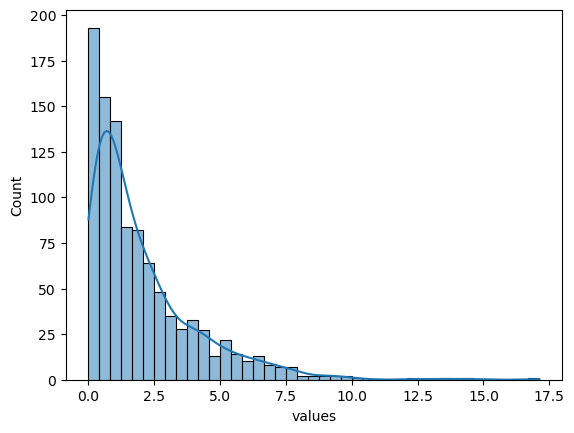

In [33]:
sns.histplot(df['values'], kde=True)

In [35]:
from sklearn.preprocessing import PowerTransformer
from sklearn.preprocessing import QuantileTransformer

pt_boxcox = PowerTransformer(method='box-cox', standardize=False)
pt_yeo_johnson = PowerTransformer(method='yeo-johnson', standardize=False)
qt_normal = QuantileTransformer(output_distribution='normal')

# boxcox k liay data must be positive

df['box-cox'] = pt_boxcox.fit_transform(df[['values']]+1)
df['Yeo_jonhson'] = pt_yeo_johnson.fit_transform(df[['values']])
df['Quantile'] = qt_normal.fit_transform(df[['values']]) 

In [36]:
df.head()

,values,box-cox,Yeo_jonhson,Quantile
0,1.591749,0.787485,0.787485,0.162552
1,2.511862,0.980233,0.980233,0.587964
2,1.846446,0.849553,0.849553,0.286135
3,1.574402,0.782945,0.782945,0.157469
4,1.102097,0.639848,0.639848,-0.154930


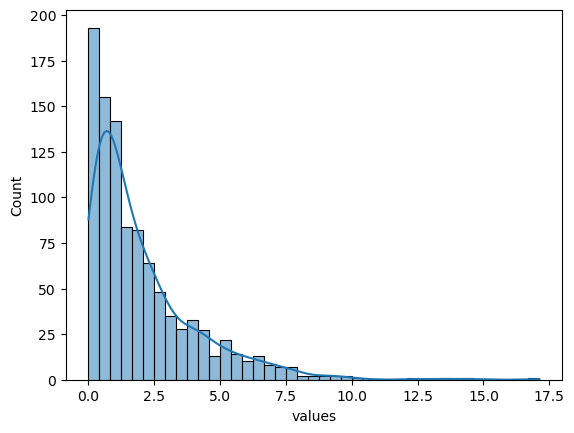

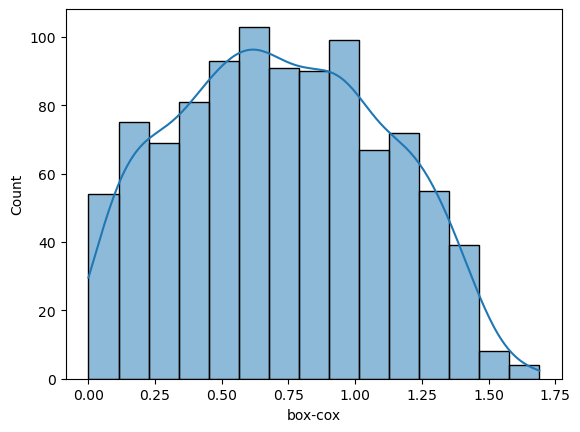

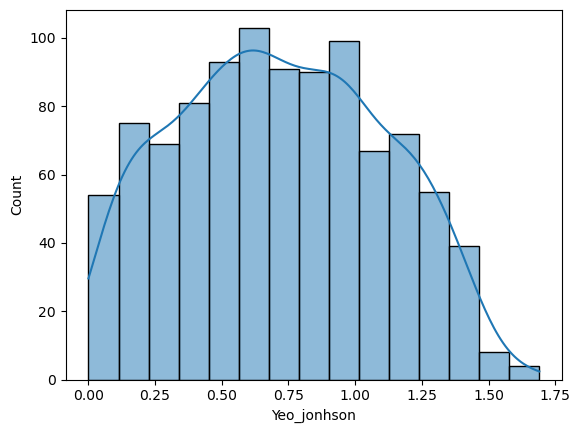

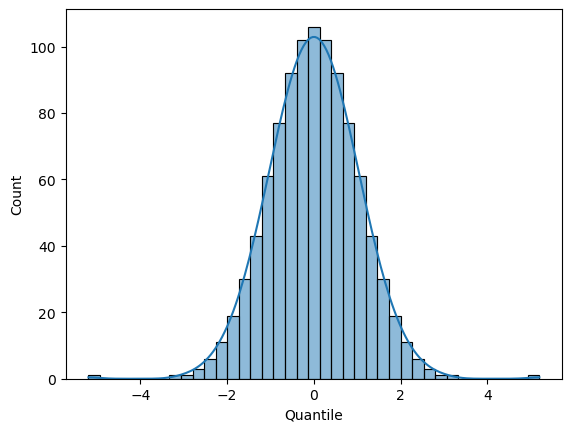

In [37]:
#  create histograms for all column using sns.hist and kde=true use a for loop
for column in df.columns:
    sns.histplot(df[column], kde=True)
    plt.show()